In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('001 output of dealing with outliers.csv')

In [25]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000.0,4.0,1.0,2.0,yes,no,yes,no,no,2.0,no,semi-furnished
1,9100000,6600.0,4.0,2.0,2.0,yes,yes,yes,no,yes,1.0,yes,unfurnished
2,8960000,8500.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished
3,8890000,4600.0,3.0,2.0,2.0,yes,yes,no,no,yes,2.0,no,furnished
4,8855000,6420.0,3.0,2.0,2.0,yes,no,no,no,yes,1.0,yes,semi-furnished


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             530 non-null    int64  
 1   area              526 non-null    float64
 2   bedrooms          526 non-null    float64
 3   bathrooms         516 non-null    float64
 4   stories           514 non-null    float64
 5   mainroad          511 non-null    object 
 6   guestroom         507 non-null    object 
 7   basement          523 non-null    object 
 8   hotwaterheating   520 non-null    object 
 9   airconditioning   524 non-null    object 
 10  parking           528 non-null    float64
 11  prefarea          149 non-null    object 
 12  furnishingstatus  528 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 54.0+ KB


In [27]:
data.isnull().sum().sort_values()

price                 0
parking               2
furnishingstatus      2
area                  4
bedrooms              4
airconditioning       6
basement              7
hotwaterheating      10
bathrooms            14
stories              16
mainroad             19
guestroom            23
prefarea            381
dtype: int64

In [34]:
def percent_missing(df):
    percent = 100 * df.isnull().sum() / len(df)
    percent = percent.sort_values()
    return percent

In [35]:
_data = percent_missing(data)
_data

price                0.000000
parking              0.377358
furnishingstatus     0.377358
area                 0.754717
bedrooms             0.754717
airconditioning      1.132075
basement             1.320755
hotwaterheating      1.886792
bathrooms            2.641509
stories              3.018868
mainroad             3.584906
guestroom            4.339623
prefarea            71.886792
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'price'),
  Text(1, 0, 'parking'),
  Text(2, 0, 'furnishingstatus'),
  Text(3, 0, 'area'),
  Text(4, 0, 'bedrooms'),
  Text(5, 0, 'airconditioning'),
  Text(6, 0, 'basement'),
  Text(7, 0, 'hotwaterheating'),
  Text(8, 0, 'bathrooms'),
  Text(9, 0, 'stories'),
  Text(10, 0, 'mainroad'),
  Text(11, 0, 'guestroom'),
  Text(12, 0, 'prefarea')])

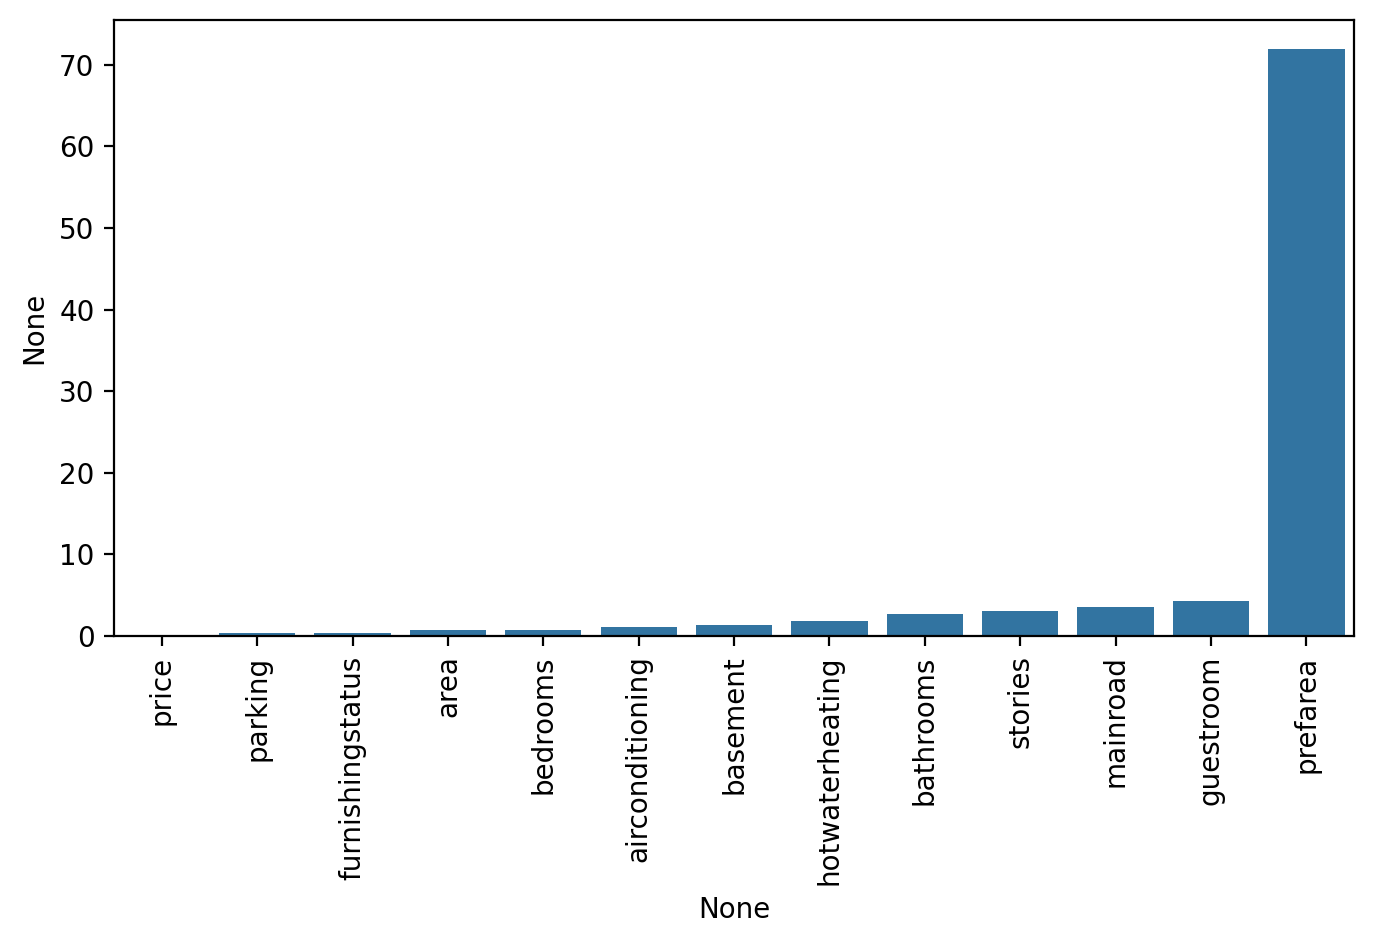

In [37]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=_data.index,y=_data)
plt.xticks(rotation=90)

In [42]:
data[data['parking'].isnull()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
212,4690000,6000.0,2.0,1.0,1.0,yes,no,yes,NaN,NaN,NaN,NaN,NaN
255,4340000,4500.0,3.0,2.0,3.0,yes,no,no,yes,NaN,NaN,NaN,NaN


In [43]:
df = data.dropna(axis=0,subset=['parking','furnishingstatus','area','bedrooms'])
_data = percent_missing(df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'price'),
  Text(1, 0, 'area'),
  Text(2, 0, 'bedrooms'),
  Text(3, 0, 'parking'),
  Text(4, 0, 'furnishingstatus'),
  Text(5, 0, 'airconditioning'),
  Text(6, 0, 'basement'),
  Text(7, 0, 'hotwaterheating'),
  Text(8, 0, 'bathrooms'),
  Text(9, 0, 'stories'),
  Text(10, 0, 'mainroad'),
  Text(11, 0, 'guestroom'),
  Text(12, 0, 'prefarea')])

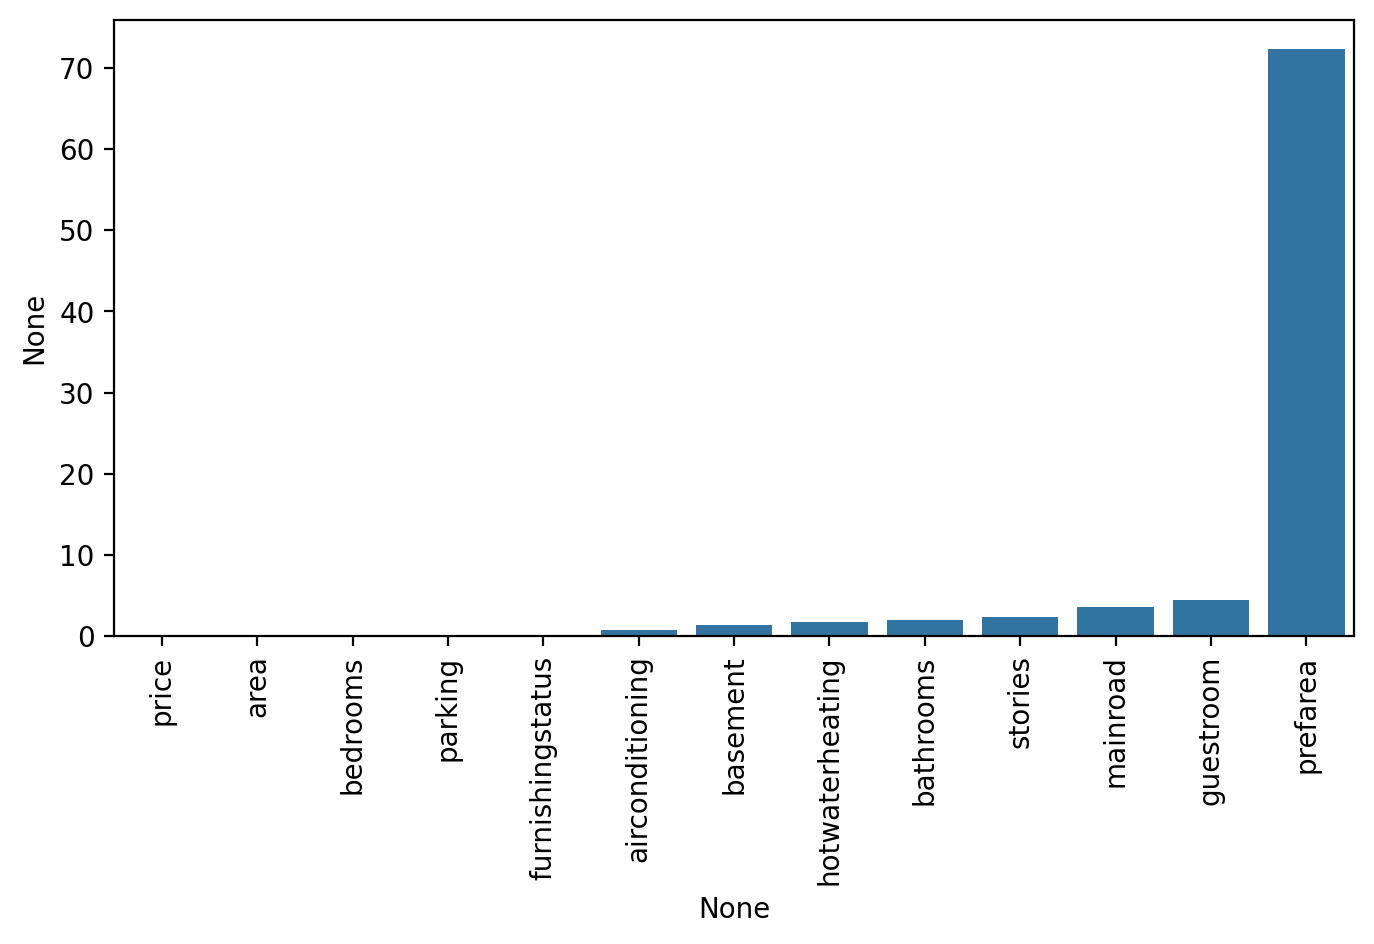

In [44]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=_data.index,y=_data)
plt.xticks(rotation=90)